<a href="https://colab.research.google.com/github/frfusch21/DTS_GGU_5/blob/Elisabeth-S/GGU5_Elisabeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#EXPLORE DATA QOITO

In [5]:
#memanggil data dalam file csv
df = pd.read_csv('uio_clean.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,N,2025,24228,346
1,2,Quito,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,N,1390,16680,456
2,3,Quito,2016-09-16 06:29:36,2016-09-18 06:41:33,-78.469551,-0.143636,-78.470277,-0.131083,N,130317,1987,290
3,4,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,N,1933,25146,302
4,5,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,N,948,4625,314


##Tipe data

In [6]:
#melihat info jumlah dan type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32366 entries, 0 to 32365
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  32366 non-null  int64  
 1   vendor_id           32366 non-null  object 
 2   pickup_datetime     32366 non-null  object 
 3   dropoff_datetime    32366 non-null  object 
 4   pickup_longitude    32366 non-null  float64
 5   pickup_latitude     32366 non-null  float64
 6   dropoff_longitude   32366 non-null  float64
 7   dropoff_latitude    32366 non-null  float64
 8   store_and_fwd_flag  32366 non-null  object 
 9   trip_duration       32366 non-null  int64  
 10  dist_meters         32366 non-null  int64  
 11  wait_sec            32366 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 3.0+ MB


In [7]:
#mengubah bentuk data pickup dan dropoff datetime ke bentuk datetime
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime, format='%Y-%m-%d %H:%M')
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime, format='%Y-%m-%d %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32366 entries, 0 to 32365
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  32366 non-null  int64         
 1   vendor_id           32366 non-null  object        
 2   pickup_datetime     32366 non-null  datetime64[ns]
 3   dropoff_datetime    32366 non-null  datetime64[ns]
 4   pickup_longitude    32366 non-null  float64       
 5   pickup_latitude     32366 non-null  float64       
 6   dropoff_longitude   32366 non-null  float64       
 7   dropoff_latitude    32366 non-null  float64       
 8   store_and_fwd_flag  32366 non-null  object        
 9   trip_duration       32366 non-null  int64         
 10  dist_meters         32366 non-null  int64         
 11  wait_sec            32366 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 3.0+ MB


##Jenis Vendor_id pada data set

[Text(0.5, 1.0, 'Grafik Persebaran Jumlah vendor taxi di Kota Quito')]

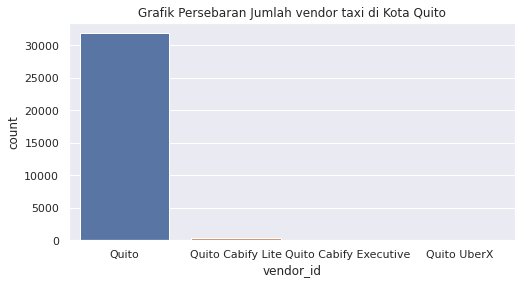

In [8]:
#melihat persebaran jumlah vendor taxi
sns.set(rc = {'figure.figsize':(8,4)})
sns.countplot(data = df, x = df['vendor_id']).set(title='Grafik Persebaran Jumlah vendor taxi di Kota Quito')

##Penggunaan taxi berdasarkan waktu

In [9]:
#membuat field pick_day pada dataset yang berisi hari pickup berdasarkan pickup_datetime
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
day = df['pickup_day']
df

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,pickup_day
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,N,2025,24228,346,Saturday
1,2,Quito,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,N,1390,16680,456,Sunday
2,3,Quito,2016-09-16 06:29:36,2016-09-18 06:41:33,-78.469551,-0.143636,-78.470277,-0.131083,N,130317,1987,290,Friday
3,4,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,N,1933,25146,302,Sunday
4,5,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,N,948,4625,314,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32361,32362,Quito,2016-10-27 08:36:09,2016-10-27 09:19:59,-78.485382,-0.174790,-78.487138,-0.175598,N,2631,4872,2006,Thursday
32362,32363,Quito,2016-10-27 09:30:21,2016-10-28 05:32:38,-78.377726,-0.212579,-78.388333,-0.190998,N,28938,2906,31,Thursday
32363,32364,Quito,2016-10-27 12:10:18,2016-10-27 06:33:53,-78.477247,-0.107514,-78.490093,-0.100859,N,66216,23607,958,Thursday
32364,32365,Quito,2016-10-25 04:58:55,2016-10-25 05:00:25,-78.550264,-0.256730,-78.550306,-0.256756,N,91,43,70,Tuesday


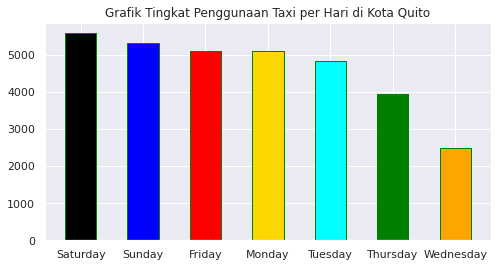

In [10]:
#melihat persebaran penggunaan taksi per hari
plt.bar(x = pd.Series.unique(day), height= pd.Series.value_counts(day), width=0.5, 
        color=('black','blue','red','gold','cyan','green', 'orange'), 
        edgecolor='green')
plt.title("Grafik Tingkat Penggunaan Taxi per Hari di Kota Quito")
plt.show()

In [11]:
#membuat field pick_date untuk memisahkan informasi tanggal pickup
df['pickup_date'] = df['pickup_datetime'].dt.date
df = df.sort_values('pickup_date', ascending=True)
df

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,pickup_day,pickup_date
22001,22002,Quito,2014-12-31 11:24:58,2017-03-21 11:05:50,-78.497111,-0.268710,-78.497123,-0.268737,N,70026052,1359,52168,Wednesday,2014-12-31
27575,27576,Quito,2016-05-13 08:50:34,2016-07-22 05:16:56,-78.475110,-0.160849,-78.485771,-0.206527,N,6078382,8584,15308,Friday,2016-05-13
257,258,Quito,2016-05-27 06:14:14,2016-09-21 05:43:41,-78.508943,-0.145293,-78.483182,-0.191437,N,10106967,5883,545,Friday,2016-05-27
11981,11982,Quito,2016-05-31 08:44:22,2016-07-02 10:06:17,-78.477271,-0.192212,-78.477870,-0.190849,N,2812916,179,2,Tuesday,2016-05-31
12097,12098,Quito,2016-06-03 09:07:42,2016-07-04 09:41:43,-78.476981,-0.156846,-78.462994,-0.093474,N,2680441,7327,122,Friday,2016-06-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11124,11125,Quito,2017-08-01 01:19:15,2017-08-01 01:44:31,-78.542785,-0.304526,-78.544895,-0.259091,N,1516,7440,743,Tuesday,2017-08-01
11123,11124,Quito,2017-08-01 01:35:35,2017-08-01 01:40:36,-78.552576,-0.279311,-78.541749,-0.286561,N,301,1517,139,Tuesday,2017-08-01
11122,11123,Quito,2017-08-01 01:30:50,2017-08-01 01:39:40,-78.495120,-0.126518,-78.491961,-0.118513,N,531,2351,197,Tuesday,2017-08-01
11139,11140,Quito,2017-08-01 03:11:50,2017-08-01 03:55:04,-78.491524,-0.193929,-78.481168,-0.100729,N,2595,11879,1083,Tuesday,2017-08-01


In [12]:
#menghapus data row 22001, karenamemiliki jarak waktu yg cukup jauh dengan data lainnya
df = df.drop(index=22001)

In [13]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,pickup_day,pickup_date
27575,27576,Quito,2016-05-13 08:50:34,2016-07-22 05:16:56,-78.475110,-0.160849,-78.485771,-0.206527,N,6078382,8584,15308,Friday,2016-05-13
257,258,Quito,2016-05-27 06:14:14,2016-09-21 05:43:41,-78.508943,-0.145293,-78.483182,-0.191437,N,10106967,5883,545,Friday,2016-05-27
11981,11982,Quito,2016-05-31 08:44:22,2016-07-02 10:06:17,-78.477271,-0.192212,-78.477870,-0.190849,N,2812916,179,2,Tuesday,2016-05-31
12097,12098,Quito,2016-06-03 09:07:42,2016-07-04 09:41:43,-78.476981,-0.156846,-78.462994,-0.093474,N,2680441,7327,122,Friday,2016-06-03
2306,2307,Quito,2016-06-09 05:56:52,2016-07-13 01:11:34,-78.484176,-0.234505,-78.484151,-0.234209,N,2920482,33,46,Thursday,2016-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11124,11125,Quito,2017-08-01 01:19:15,2017-08-01 01:44:31,-78.542785,-0.304526,-78.544895,-0.259091,N,1516,7440,743,Tuesday,2017-08-01
11123,11124,Quito,2017-08-01 01:35:35,2017-08-01 01:40:36,-78.552576,-0.279311,-78.541749,-0.286561,N,301,1517,139,Tuesday,2017-08-01
11122,11123,Quito,2017-08-01 01:30:50,2017-08-01 01:39:40,-78.495120,-0.126518,-78.491961,-0.118513,N,531,2351,197,Tuesday,2017-08-01
11139,11140,Quito,2017-08-01 03:11:50,2017-08-01 03:55:04,-78.491524,-0.193929,-78.481168,-0.100729,N,2595,11879,1083,Tuesday,2017-08-01


In [14]:
#membuat dataset pickup yang berisi tanggal pickup dan jumlah pickup dan mengurutkannya dari kecil ke besar
pickup = pd.DataFrame(df.groupby(['pickup_date'])['id'].count())
pickup = pickup.reset_index()
pickup = pickup.sort_values('pickup_date', ascending=True)
pickup

,pickup_date,id
0,2016-05-13,1
1,2016-05-27,1
2,2016-05-31,1
3,2016-06-03,1
4,2016-06-09,1
...,...,...
411,2017-07-28,131
412,2017-07-29,88
413,2017-07-30,72
414,2017-07-31,84


[Text(0.5, 1.0, 'Grafik Jumlah Pickup taxi tahun 2016 - 2017')]

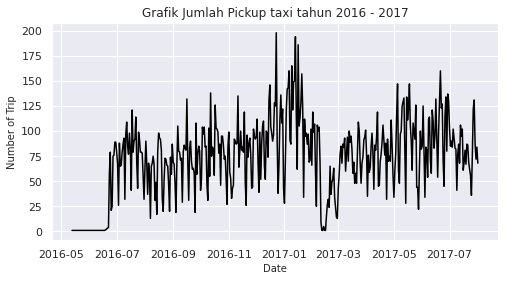

In [15]:
#menampilkan data jumlah pickup dalam grafik line
graph = sns.lineplot(data= pickup, x ='pickup_date', y = 'id', color = 'black')
graph.set_xlabel("Date", fontsize = 10)
graph.set_ylabel("Number of Trip", fontsize = 10)
graph.set(title='Grafik Jumlah Pickup taxi tahun 2016 - 2017')

##Persebaran titik pick up dan drop off

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[Text(0.5, 1.0, 'Sebaran Titik Dropoff Taxi di Quito')]

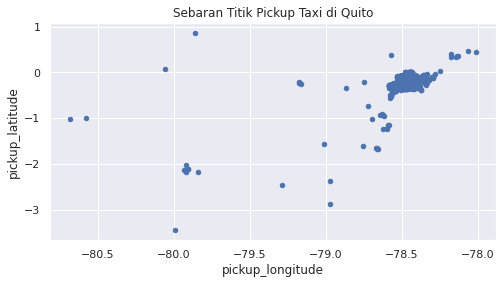

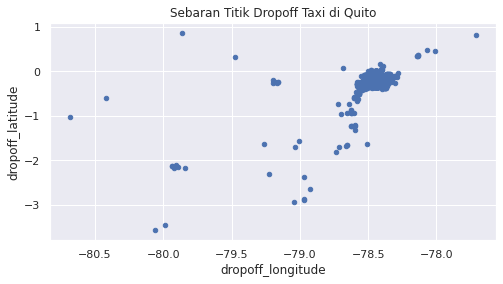

In [16]:
#membuat peta persebaran titik pickup dan dropoff
df.plot(kind='scatter', x="pickup_longitude", y="pickup_latitude").set( title= "Sebaran Titik Pickup Taxi di Quito")
df.plot(kind='scatter', x="dropoff_longitude", y="dropoff_latitude").set( title= "Sebaran Titik Dropoff Taxi di Quito")

##Observasi data dist_meter, trip duration, wait_sec

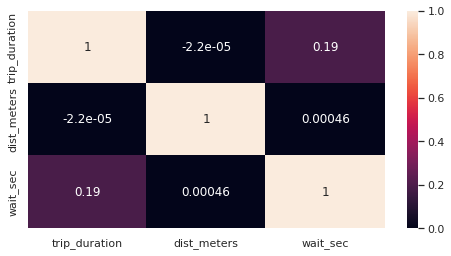

In [17]:
#melihat nilai korelasi antar variabel menggunakan metode pearson
sns.heatmap(df[['trip_duration','dist_meters',	'wait_sec']].corr(method='pearson'), annot=True)

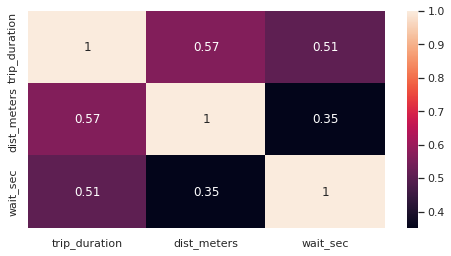

In [18]:
#melihat nilai korelasi antar variabel menggunakan metode kendall
sns.heatmap(df[['trip_duration','dist_meters',	'wait_sec']].corr(method='kendall'), annot=True)

[Text(0.5, 1.0, 'Durasi Perjalanan Taxi per Hari')]

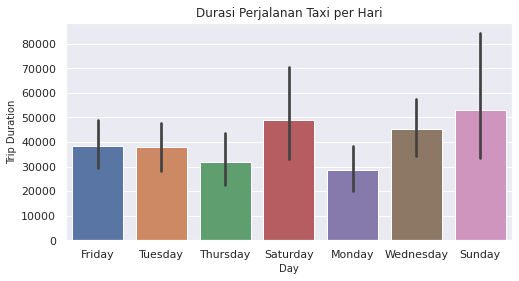

In [19]:
x = sns.barplot(data= df, y ='trip_duration', x = 'pickup_day')
x.set_xlabel("Day", fontsize = 10)
x.set_ylabel("Trip Duration", fontsize = 10)
x.set(title='Durasi Perjalanan Taxi per Hari')

[Text(0.5, 1.0, 'Durasi Perjalanan Taxi dari 2016 sampai 2017')]

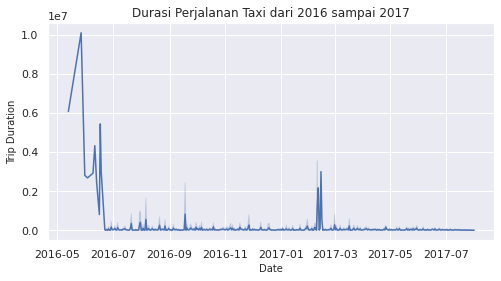

In [20]:
x1=sns.lineplot(data= df, y ='trip_duration', x = 'pickup_date')
x1.set_xlabel("Date", fontsize = 10)
x1.set_ylabel("Trip Duration", fontsize = 10)
x1.set(title='Durasi Perjalanan Taxi dari 2016 sampai 2017')


[Text(0.5, 1.0, 'Jarak Tempuh Perjalanan Taxi per Hari')]

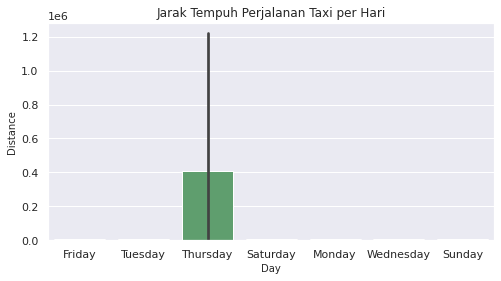

In [21]:
x2=sns.barplot(data= df, y ='dist_meters', x = 'pickup_day')
x2.set_xlabel("Day", fontsize = 10)
x2.set_ylabel("Distance", fontsize = 10)
x2.set(title='Jarak Tempuh Perjalanan Taxi per Hari')

[Text(0.5, 1.0, 'Lama Taxi Menunggu Penumpang per Hari')]

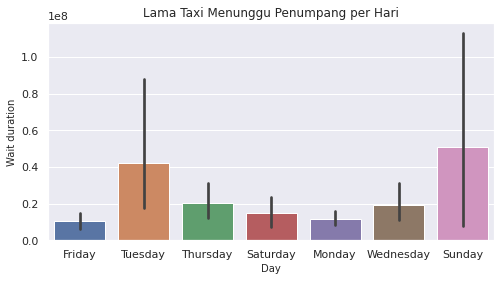

In [22]:
x2=sns.barplot(data= df, y ='wait_sec', x = 'pickup_day')
x2.set_xlabel("Day", fontsize = 10)
x2.set_ylabel("Wait duration", fontsize = 10)
x2.set(title='Lama Taxi Menunggu Penumpang per Hari')

In [23]:
#menghitung laju kecepatan taxi (km/jam)
dist = df['dist_meters']/1000
time = (df['trip_duration'] - df['wait_sec'])/3600

speed_kmh = (dist/time)
print(speed_kmh)

27575     0.005097
257       0.002096
11981     0.000229
12097     0.009841
2306      0.000041
           ...    
11124    34.649418
11123    33.711111
11122    25.340120
11139    28.283333
11120    29.786020
Length: 32365, dtype: float64


In [24]:
#memasukkan variabel kecepatan ke dalam dataset
df['speed_kmh'] = speed_kmh

In [25]:
#mengelompokkan beberapa variabel kedalam data dan melihat deskripsi dari datanya
data = df[['trip_duration','dist_meters',	'wait_sec',	'pickup_day',	'pickup_date','speed_kmh']]
data.describe()

,trip_duration,dist_meters,wait_sec,speed_kmh
count,3.236500e+04,3.236500e+04,3.236500e+04,3.236500e+04
mean,3.922003e+04,7.302966e+04,2.204126e+07,inf
std,4.358732e+05,1.193689e+07,7.311849e+08,NaN
min,-3.887110e+05,1.100000e+01,0.000000e+00,-2.383920e+04
25%,5.000000e+02,2.148000e+03,1.070000e+02,1.962947e+01
50%,8.970000e+02,4.124000e+03,2.430000e+02,2.738729e+01
75%,1.710000e+03,7.475000e+03,4.990000e+02,3.324878e+01
max,3.083200e+07,2.147484e+09,9.516306e+10,inf


In [26]:
#mengambil data kecepatan dengan rentang nilai 5 sampai 100
clean = data['speed_kmh'].between(5, 100)

data = data[clean]
data.describe()

,trip_duration,dist_meters,wait_sec,speed_kmh
count,27955.000000,27955.000000,27955.000000,27955.000000
mean,1323.883026,6167.157217,490.006546,29.135621
std,3074.350848,8948.438300,1685.447206,10.733846
min,3.000000,20.000000,0.000000,5.004848
25%,487.000000,2341.500000,110.000000,23.452599
50%,830.000000,4205.000000,238.000000,28.476244
75%,1407.000000,7345.000000,460.000000,33.889293
max,216386.000000,601910.000000,69278.000000,99.900000


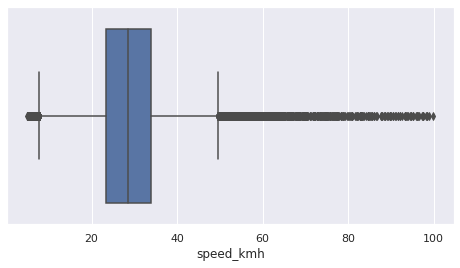

In [27]:
#membuat boxplot dari kecepatan
sns.boxplot(x='speed_kmh', data=data)